In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
#loading and inspecting the data
if (Path.cwd() / 'data').exists():
    project_root = Path.cwd()
else:
    project_root = Path.cwd().parents[0]

# Define CSV path
csv_path = project_root / 'data' / 'raw' / 'audible_raw.csv'

# Load the CSV
try:
    audible = pd.read_csv(csv_path)
    print("✅ CSV loaded successfully.")
    display(audible.head())
except FileNotFoundError:
    print(f"❌ File not found: {csv_path}")
    
audible 



✅ CSV loaded successfully.


,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [8]:
#inspect the columns' data types
audible.info()

# Clean data
# Remove Writtenby: from the author column
audible['author'] = audible['author'].str.replace('Writtenby:', '')

# Remove Narratedby: from the narrator column
audible['narrator'] = audible['narrator'].str.replace('Narratedby:', '')

# Check the results
audible 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [9]:
# Get a glimpse of the stars column
audible.stars.sample(n=10)

15645                  Not rated yet
75649                  Not rated yet
59197    4.5 out of 5 stars8 ratings
75590                  Not rated yet
10576      4 out of 5 stars8 ratings
24226                  Not rated yet
22191                  Not rated yet
75220      4 out of 5 stars6 ratings
18898       5 out of 5 stars1 rating
70293                  Not rated yet
Name: stars, dtype: object

In [10]:
# Explore the values of the star column that are not 'Not rated yet'
audible[audible.stars != 'Not rated yet'].stars.sample(n=10)


63877        5 out of 5 stars1 rating
71331        5 out of 5 stars1 rating
29662     4.5 out of 5 stars2 ratings
65509        5 out of 5 stars1 rating
58622      5 out of 5 stars11 ratings
11171    4.5 out of 5 stars20 ratings
34338     4.5 out of 5 stars2 ratings
77166        5 out of 5 stars1 rating
5021         2 out of 5 stars1 rating
82487       4 out of 5 stars3 ratings
Name: stars, dtype: object

In [11]:
# Replace 'Not rated yet' with NaN
audible.stars.replace('Not rated yet', np.nan, inplace=True)

In [15]:
# Extract number of stars into rating_stars and turn into float
audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)

# Replace the comma, extract number of ratings into n_ratings and turn into float
audible['n_ratings'] = audible['stars'].str.replace(',', '').str.extract('(\d+) rating').astype(float)


# Examine the new rating_stars and n_ratings columns
audible[['rating_stars', 'n_ratings']]

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mashel\AppData\Local\Temp\ipykernel_5392\454591872.py:2: SyntaxWarning: invalid escape sequence '\d'
  audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)
C:\Users\mashel\AppData\Local\Temp\ipykernel_5392\454591872.py:5: SyntaxWarning: invalid escape sequence '\d'
  audible['n_ratings'] = audible['stars'].str.replace(',', '').str.extract('(\d+) rating').astype(float)


,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


In [16]:
# Dorp the stars column
audible.drop('stars', axis=1, inplace=True)

# Check the results
audible


,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,596.00,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,820.00,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,938.00,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,680.00,NaN,NaN


In [17]:
# Explore the price column
audible.price.sample(n=10)

32145      586.00
31096      837.00
44351      586.00
82883      820.00
18884      422.00
82095      568.00
46808      691.00
62231      377.00
60765      267.00
60005    1,172.00
Name: price, dtype: object

In [18]:
# Replace the comma with ''
audible['price'] = audible.price.str.replace(',', '')

# Replace 'Free' with 0
audible['price'] = audible.price.str.replace('Free', '0')

# Turn price to float
audible['price'] = audible.price.astype(float)


In [19]:
# look at the unique values in the rating_starss column
audible.rating_stars.unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

In [20]:
# Turn rating_stars to category
audible['rating_stars'] = audible.rating_stars.astype('category')

In [23]:
# Convert releasedate to datetime
audible['releasedate'] = pd.to_datetime(audible.releasedate)

# Inspect the dataframe 
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


In [24]:
# Explore the values in the time column
audible

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-04-08,English,468.0,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-01-05,English,820.0,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,2020-06-11,English,410.0,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,2021-05-10,English,615.0,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,2010-01-13,English,820.0,4.5,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,2017-09-03,English,596.0,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,2017-02-21,English,820.0,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,2016-12-30,English,938.0,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,2011-02-23,English,680.0,NaN,NaN


In [25]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
audible.time[audible.time.str.contains('min')].sample(n=10)

83659    10 hrs and 17 mins
26266      3 hrs and 5 mins
76451    14 hrs and 16 mins
3419                54 mins
65651     6 hrs and 38 mins
26839    10 hrs and 21 mins
86669      2 hrs and 8 mins
19836               29 mins
81948     3 hrs and 44 mins
68627     4 hrs and 24 mins
Name: time, dtype: object

In [26]:
# Replace hrs, mins, and 'Less than 1 minute'
# Replace hrs, mins, and 'Less than 1 minute'
audible['time'] = audible.time.str.replace('hrs', 'hr')
audible['time'] = audible.time.str.replace('mins', 'min')
audible['time'] = audible.time.str.replace('Less than 1 minute', '1 min')

# Check the results
audible[['time']]


,time
0,2 hr and 20 min
1,13 hr and 8 min
2,2 hr and 3 min
3,11 hr and 16 min
4,10 hr
...,...
87484,7 hr and 34 min
87485,10 hr and 7 min
87486,19 hr and 4 min
87487,4 hr and 8 min


In [27]:
# Extract the number of hours, turn to integer
hours = audible['time'].str.extract('(\d+) hr').fillna(0).astype(int)

# Extract the number of minutes, turn to integer
mins = audible['time'].str.extract('(\d+) min').fillna(0).astype(int)

# Combine hours and minutes into the time_mins column
audible['time_mins'] = 60 * hours + mins

# Check the results
audible[['time_mins']]


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mashel\AppData\Local\Temp\ipykernel_5392\2231753686.py:2: SyntaxWarning: invalid escape sequence '\d'
  hours = audible['time'].str.extract('(\d+) hr').fillna(0).astype(int)
C:\Users\mashel\AppData\Local\Temp\ipykernel_5392\2231753686.py:5: SyntaxWarning: invalid escape sequence '\d'
  mins = audible['time'].str.extract('(\d+) min').fillna(0).astype(int)


,time_mins
0,140
1,788
2,123
3,676
4,600
...,...
87484,454
87485,607
87486,1144
87487,248


In [28]:
# Drop the time column
audible.drop(columns=['time'], axis=1, inplace=True)

In [29]:
# Inspect the dataframe 
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   releasedate   87489 non-null  datetime64[ns]
 4   language      87489 non-null  object        
 5   price         87489 non-null  float64       
 6   rating_stars  15072 non-null  category      
 7   n_ratings     15072 non-null  float64       
 8   time_mins     87489 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.4+ MB


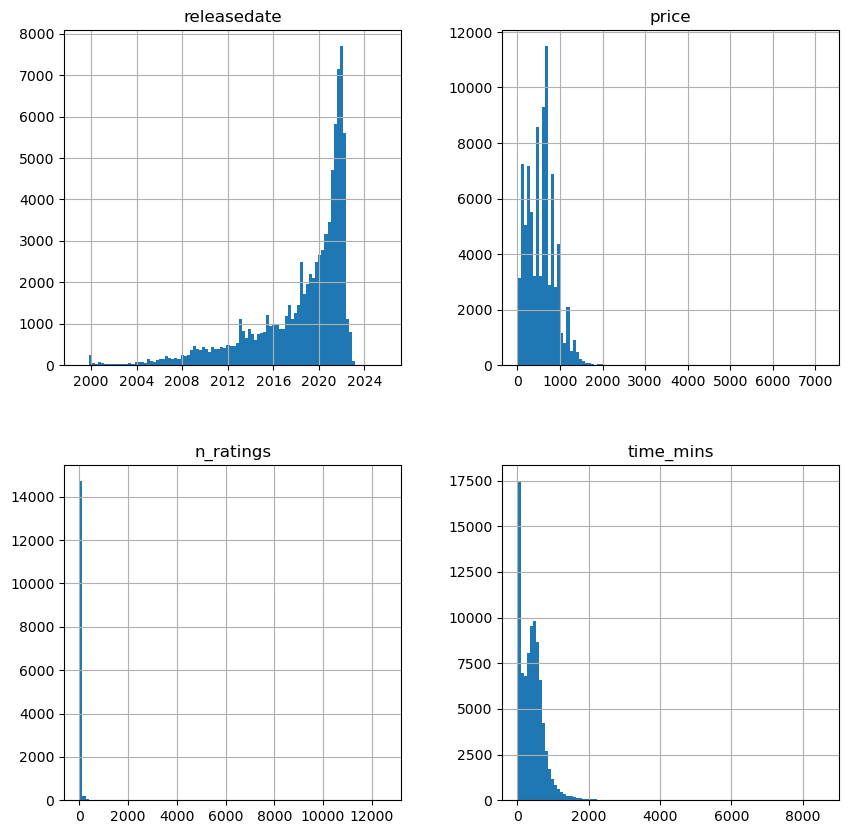

In [30]:
# Plot histograms of all the numerical columns
audible.hist(figsize=(10,10), bins=100)
plt.show()

In [31]:
# Look at the numeric columns
audible.describe()

,releasedate,price,n_ratings,time_mins
count,87489,87489.000000,15072.000000,87489.000000
mean,2018-06-22 01:35:29.780886528,559.009246,21.613190,417.497663
min,1998-12-27 00:00:00,0.000000,1.000000,1.000000
25%,2016-08-30 00:00:00,268.000000,1.000000,142.000000
50%,2020-01-30 00:00:00,585.000000,2.000000,386.000000
75%,2021-08-04 00:00:00,755.000000,7.000000,584.000000
max,2025-11-14 00:00:00,7198.000000,12573.000000,8595.000000
std,NaN,336.096642,207.479634,364.559399


In [32]:
# Look at the non numeric columns
audible.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,NaN,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,NaN,English,5.0
freq,20,874,1034,NaN,61884,6761.0
mean,NaN,NaN,NaN,2018-06-22 01:35:29.780886528,NaN,NaN
min,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2016-08-30 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2020-01-30 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2021-08-04 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


In [33]:
# Transform prices to USD (multiply times 0.012)
audible['price'] = audible.price * .012

# Check the results
audible['price'].describe()

count    87489.000000
mean         6.708111
std          4.033160
min          0.000000
25%          3.216000
50%          7.020000
75%          9.060000
max         86.376000
Name: price, dtype: float64

In [34]:
# Inspect the language column before making changes
audible.language.unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [35]:
# Update capitalization in the language column
audible['language'] = audible.language.str.capitalize()

# Check the results
audible.language.unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

In [36]:
# Look for duplicate rows
audible.duplicated().sum()

np.int64(0)

In [37]:
# Create a list of our subset columns and assign to subset_cols
subset_cols=['name', 'author', 'narrator', 'time_mins', 'price']

# Check for duplicates using our subset of columns
audible.duplicated(subset=subset_cols).sum()

np.int64(70)

In [39]:
# Check the duplicated rows keeping the duplicates and order by the name column
audible[audible.duplicated(subset=subset_cols, keep=False)].sort_values(by=['name'])

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins


In [ ]:
# Drop duplicated rows keeping the last release date
audible.drop_duplicates(subset=subset_cols, keep='last', inplace=True)

In [42]:
# Check again for duplicates using our subset of columns
audible.duplicated(subset=subset_cols).sum()

np.int64(0)

In [43]:
# Check for null values
audible.isna().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_mins           0
dtype: int64

In [44]:
# Save the dataframe to a new file: 'audible_clean.csv'
audible.to_csv(project_root / 'data' / 'processed' / 'audible_clean.csv', index=False)
print("✅ Data cleaned and saved to 'audible_clean.csv'.")

✅ Data cleaned and saved to 'audible_clean.csv'.
